<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/6_NN_DeepLearning/EjemploRegAutodiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución problema lineal por gradiente simbólico en mini lotes

$$\hat{y}=f(X)=Xw$$

$X\in\mathbb{R}^{N \times P},$  $w\in\mathbb{R}^{2\times 1},$ $y,\hat{y}\in\mathbb{R}^{N\times 1},$

$$w^* = \arg \min_w \mathbb{E}_{p(X,y)}\{\|Xw-y\|^2_2\}+\lambda\|w\|^2_2$$

$$\nabla_w\mathcal{L}(f(X|w),y)=2\left(X^\top\left(Xw-y\right)+\lambda w\right)$$

## Solución analítica

$w^* = \left(X^\top X+\lambda I\right)^{-1}X^\top y$

## Por gradiente descendiente

$w_i = w_{i-1} - \eta_i \nabla_w\mathcal{L}(f(X|w_{i-1}),y)$

## Diferenciación automática (algorítmica) estima $\nabla_w\mathcal{L}(f(X|w_{i-1}),y)$

(500, 2)


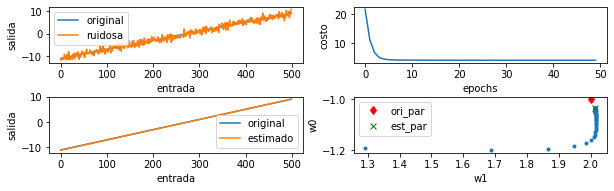

[[ 2 -1]] [[ 2.01494255 -1.03552655]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
N = 500
x = np.linspace(-5,5,N)
w1 = 2
w0 = -1
#y = w1*x + w0
Xdata = np.c_[x.reshape(-1,1),np.ones((N,1))]
w = np.array([w1,w0]).reshape(-1,1)
y = Xdata.dot(w) # 500 x2  x 2  x 1
print(Xdata.shape)
var = 0.8
noise = np.sqrt(var)*np.random.randn(N)
yn = y + noise.reshape(-1,1)

#training
epochs = 50
batch_size = 32
lr = 1e-4  #hyperparametro learning rate
we = np.random.randn(2).reshape(-1,1)  #
loss = np.zeros((epochs))
lamb = 1e-1 # hyperparametro regularizacion
wM = np.zeros((epochs,len(we)))
 
Niter = int(Xdata.shape[0]/batch_size) #N iter por epoch
for epoch in range(epochs): #epochs
  for i in range(1,Niter+1): #iterar por bathces en epoch
    Xbatch = Xdata[(i-1)*batch_size:i*batch_size,:]
    ynbatch = yn[(i-1)*batch_size:i*batch_size]
    yebatch = (Xbatch.dot(we)).reshape(-1,1)
    grad = (2*Xbatch.T).dot(yebatch-ynbatch) + 2*lamb*we# norma l2
    we = we - lr*grad
  loss[epoch] = np.linalg.norm(ynbatch-yebatch) + lamb*np.linalg.norm(we)
  wM[epoch] = we.reshape(1,-1)
    

plt.figure(figsize=(10,6))

plt.subplot(421)
plt.plot(y, label = 'original')
plt.plot(yn,label = 'ruidosa')
plt.xlabel('entrada')
plt.ylabel('salida')
plt.legend()

plt.subplot(422)
plt.plot(np.arange(epochs),loss)
plt.xlabel('epochs')
plt.ylabel('costo')


plt.subplot(423)
plt.plot(y, label = 'original')
ye = Xdata.dot(we)
plt.plot(ye, label = 'estimado')
plt.xlabel('entrada')
plt.ylabel('salida')
plt.legend()


plt.subplot(424)
plt.plot(wM[:,0],wM[:,1],'.' )
plt.plot(w[0],w[1],'rd',label='ori_par' )
plt.plot(we[0],we[1],'gx',label='est_par' )


plt.xlabel('w1')
plt.ylabel('w0')
plt.legend()


plt.subplots_adjust(wspace=0.2,hspace=0.6)
plt.show()
print(w.T,we.T)

# Solución problema lineal por gradiente automático (algorítmico)

In [5]:
import tensorflow as tf

Xdata_tf = tf.convert_to_tensor(Xdata,dtype=tf.float32)
yn_tf = tf.convert_to_tensor(yn,dtype=tf.float32)
we_tf = tf.Variable(tf.random.normal((2, 1),dtype=tf.float32))
Xdata_tf.shape

TensorShape([500, 2])

In [6]:
#funcion de perdida a derivar
def l(w,X,y,lam=1e-3):
    e = y-tf.linalg.matmul(X,w)
    return tf.linalg.matmul(e,e,transpose_a=True)+  lam*tf.linalg.matmul(we_tf,we_tf,transpose_a=True)

In [7]:
z=l(we_tf,Xdata_tf,yn_tf)
print('Costo=',z.numpy()[0])


Costo= [992.15344]


In [8]:
#calculo gradient con autodiff
lr = tf.constant(1e-4,dtype=tf.float32)
with tf.GradientTape() as tape: #crear contexto gradient tape para guardar cada operacion que envuelve una variable
    z=l(we_tf,Xdata_tf,yn_tf) #funcion de perdida (loss) para salvar memoria colocar la menor cantidad de codigo en el tape
gradients = tape.gradient(z,[we_tf]) # tape calcula  los gradientes del resultado z con respecto a [w1,w2]
print('gradi=',gradients[0].numpy()) #gradient tape hace los calculos una sola vez de forma inversa sin importar la cantidad de variables
print('wi=',we_tf.numpy())
we_tf.assign_sub(lr*gradients[0])
#we_tf -= lr*gradients[0]#tf.Variable(we_tf - lr*gradients[0],dtype=tf.float32)
print('wi-lr*gwi=',we_tf.numpy())

gradi= [[-1194.3259 ]
 [  967.36127]]
wi= [[ 1.8687546 ]
 [-0.07602023]]
wi-lr*gwi= [[ 1.9881872 ]
 [-0.17275636]]


# Ejemplo ilustrativo ciclo por lotes en keras y tf2

(500, 2)


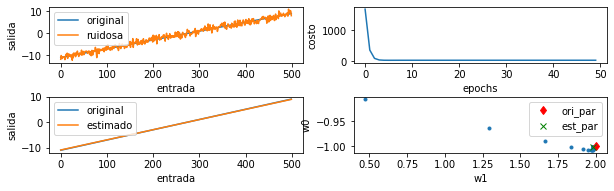

[[ 2 -1]] [[ 1.9808209 -1.0008334]]


In [9]:
N = 500
x = np.linspace(-5,5,N)
w1 = 2
w0 = -1
#y = w1*x + w0
Xdata = np.c_[x.reshape(-1,1),np.ones((N,1))]
w = np.array([w1,w0]).reshape(-1,1)
y = Xdata.dot(w) # 500 x2  x 2  x 1
print(Xdata.shape)
var = 0.8
noise = np.sqrt(var)*np.random.randn(N)
yn = y + noise.reshape(-1,1)

#pasar datos a tensores
Xdata_tf = tf.convert_to_tensor(Xdata,dtype=tf.float32)
yn_tf = tf.convert_to_tensor(yn,dtype=tf.float32)
we_tf = tf.Variable(tf.random.normal((2, 1),dtype=tf.float32))
lr = tf.constant(1e-4,dtype=tf.float32) #learning rate
lamb = tf.constant(1e-3,dtype=tf.float32) # hyperparametro regularizacion

#training
epochs = 50
batch_size = 32
loss = np.zeros((epochs))
wM = np.zeros((epochs,len(we)))
 
Niter = int(Xdata.shape[0]/batch_size) #N iter por epoch
for epoch in range(epochs): #epochs
  for i in range(1,Niter+1): #iterar por bathces en epoch
    Xbatch = Xdata[(i-1)*batch_size:i*batch_size,:]
    Xbatch_tf = tf.convert_to_tensor(Xbatch,dtype=tf.float32)
    ynbatch = yn[(i-1)*batch_size:i*batch_size]
    ynbatch_tf = tf.convert_to_tensor(ynbatch,dtype=tf.float32)
    with tf.GradientTape() as tape: #crear contexto gradient tape para guardar cada operacion que envuelve una variable
          z=l(we_tf,Xbatch_tf,ynbatch_tf) #funcion de perdida (loss) para salvar memoria colocar la menor cantidad de codigo en el tape
    gradients = tape.gradient(z,[we_tf]) # tape calcula  los gradientes del resultado z con respecto a [w1,w2]
    we_tf.assign_sub(lr*gradients[0])
    #we_tf = tf.Variable(we_tf - lr*gradients[0],dtype=tf.float32)
  wM[epoch] = we_tf.numpy().reshape(1,-1)
  loss[epoch] = z
  
we = we_tf.numpy()    

plt.figure(figsize=(10,6))

plt.subplot(421)
plt.plot(y, label = 'original')
plt.plot(yn,label = 'ruidosa')
plt.xlabel('entrada')
plt.ylabel('salida')
plt.legend()

plt.subplot(422)
plt.plot(np.arange(epochs),loss)
plt.xlabel('epochs')
plt.ylabel('costo')


plt.subplot(423)
plt.plot(y, label = 'original')
ye = Xdata.dot(we)
plt.plot(ye, label = 'estimado')
plt.xlabel('entrada')
plt.ylabel('salida')
plt.legend()


plt.subplot(424)
plt.plot(wM[:,0],wM[:,1],'.' )
plt.plot(w[0],w[1],'rd',label='ori_par' )
plt.plot(we[0],we[1],'gx',label='est_par' )


plt.xlabel('w1')
plt.ylabel('w0')
plt.legend()


plt.subplots_adjust(wspace=0.2,hspace=0.6)
plt.show()
print(w.T,we.T)